# 1. Data importing 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
path = r'/Users/jakubkondelka/Documents/CF_Instacart Basket Analysis'

In [3]:
ds = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'fixed_final_task.pkl'))

# Part 1, Q2 : Data privacy PII

#### PII sensitive data are following columns : First_name, last_name, age, fam_status, income. We would want to point this out before we start doing anything with the data, so to make sure right approach is taking place

In [7]:
ds.head(5)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,price_range_loc,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


# P1, Q3 : Regional data segmentation

In [8]:
# create a columns based on region and assign particular region to correct state
trial = ds.loc[ds['state'] == "Missouri", 'region'] = 'Midwest'


In [9]:
ds.loc[ds['state'] == "Missouri", 'region'] = 'Midwest'

In [10]:
ds.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest


In [14]:
# use loc function to locate each state and assign it region, to a new column 'region'

ds.loc[(ds['state'] == 'Missouri') | (ds['state'] == 'Wisconsin')| (ds['state'] == 'Michigan')| (ds['state'] == 'Illinois')| (ds['state'] == 'Indiana')| (ds['state'] == 'Ohio')| (ds['state'] == 'North Dakota')| (ds['state'] == 'South Dakota')| (ds['state'] == 'Nebraska')| (ds['state'] == 'Kansas')| (ds['state'] == 'Minnesota')| (ds['state'] == 'Iowa'), 'region'] = 'Midwest'
ds.loc[(ds['state'] == 'Delaware') | (ds['state'] == 'Maryland')| (ds['state'] == 'District of Columbia')| (ds['state'] == 'Virgina')| (ds['state'] == 'West Virginia')| (ds['state'] == 'North Carolina')| (ds['state'] == 'South Carolina')| (ds['state'] == 'Gerogia')| (ds['state'] == 'Florida')| (ds['state'] == 'Kentucky')| (ds['state'] == 'Tennessee')| (ds['state'] == 'Mississippi')| (ds['state'] == 'Alabama')| (ds['state'] == 'Oklahoma')| (ds['state'] == 'Texas')| (ds['state'] == 'Arkansas')| (ds['state'] == 'Louisiana'), 'region'] = 'South'
ds.loc[(ds['state'] == 'Idaho') | (ds['state'] == 'Montana')| (ds['state'] == 'Wyoming')| (ds['state'] == 'Nevada')| (ds['state'] == 'Utah')| (ds['state'] == 'Colorado')| (ds['state'] == 'Arizona')| (ds['state'] == 'New Mexico')| (ds['state'] == 'Alaska')| (ds['state'] == 'Washington')| (ds['state'] == 'Oregon')| (ds['state'] == 'California')| (ds['state'] == 'Hawaii'), 'region'] = 'West'
ds.loc[(ds['state'] == 'Maine') | (ds['state'] == 'New Hampshire')| (ds['state'] == 'Vermont')| (ds['state'] == 'Massachusetts')| (ds['state'] == 'Rhode Island')| (ds['state'] == 'Connecticut')| (ds['state'] == 'New York')| (ds['state'] == 'Pennsylvania')| (ds['state'] == 'New Jersey'), 'region'] = 'Northeast'


In [12]:
ds.shape

(32404859, 35)

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
ds.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,evaluations,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest


In [15]:
#create a new dataframe with columns region and spender_flag
df_regions = ds[['region', 'Spender_flag']]

In [16]:
# check to see rows align with rows of original dataframe, and that each state got region assigned
df_regions.shape

(32404859, 2)

In [17]:
# aggregate regions based on count in spender_flag
df_regions.groupby(['region', 'Spender_flag']).agg({'Spender_flag': ['count']})

Spender_flag
                              count
region    Spender_flag             
Midwest   High Spender       155932
          Low Spender       7441350
Northeast High Spender       108180
          Low Spender       5614511
South     High Spender       178440
          Low Spender       9315430
West      High Spender       160271
          Low Spender       8132559

#### Each region has many more low spenders than high spenders, that was expected.  South has the most high spenders and also the most low spenders. This could due to larger population count and would require more information. 

In [18]:
ds.shape

(32404859, 35)

In [15]:
#export the new data set with regions in it

ds.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'fixed2_final_task.pkl'))

# P1, Q4: Flag customers with less than 5 orders and exclude them from the dataset

In [4]:
# use loc to locate this condtion and create a new column, with flagged customers
ds.loc[ds['max_order'] < 5, 'Low Spender'] = 'YES'
ds.loc[ds['max_order'] >= 5, 'Low Spender'] = 'NO'

In [5]:
ds.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag,Low Spender
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,NO
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,NO
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,NO
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,NO
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,NO


In [6]:
# count rows of users ordering less than 5 items
ds['Low Spender'].str.contains('YES').value_counts()[True]

1440295

In [22]:
# check if Low spender in Spender_flag column returns the same value
ds['Spender_flag'].str.contains('Low Spender').value_counts()[True]

31770614

In [7]:
# create a new data set, with all people who order less than 5 items removed
ds_5plus = ds[ds["Low Spender"].str.contains("YES") == False]

In [8]:
ds_5plus.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag,Low Spender
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,NO
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,NO
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,NO
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,NO
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,NO


In [9]:
ds_5plus.shape

(30964564, 35)

### The new set contains exactly 1440295 rows less than the original ds set, which confirms that all spenders with less than 5 items were removed

In [ ]:
# export this data set 
ds_5plus.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ds_5plus.pkl'))

# P1, Q4: Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. Using this to target marketing strategy, based on regions

In [32]:
# set display options to display all columns in data set 
pd.set_option('display.max_columns', None)

In [5]:
ds.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,evaluations,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


In [11]:
# understanding columns to determine conditions for profiling
ds[['age','income','n_dependants']].describe()

,age,income,n_dependants
count,3.240486e+07,3.240486e+07,3.240486e+07
mean,4.946527e+01,9.943773e+04,1.501896e+00
std,1.848558e+01,4.305727e+04,1.118865e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.700400e+04,1.000000e+00
50%,4.900000e+01,9.661800e+04,2.000000e+00
75%,6.500000e+01,1.279120e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


#### income: divider is 75% mark. Below that = normal/low income, above it is high income
#### age: below 33 is young, 33 to 49 is middle age, 65 plus is old
#### dependatns: singles have 0, 1+ are families


In [14]:
ds['fam_status'].value_counts()

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: fam_status, dtype: int64

#### use family status as a filter as well. Single adult is single or living with parents/siblings. Parent is married or divorced/widowed 

### I will use subset of first 1 000 000 rows, to ease processing demands

### Profiles : 
#### Young adults: family status = single or living with parents, n of dependants is 0 
#### Single adults: fam status = divorced/widowned, n_dep is 1+
#### Family low/mid income: fam status is married, income is less that 127912, n of dep is 1+ 
#### Family high income: fam status is married, income is more that 127912, n of dep is 1+ 
#### Old folks: age is 65+

In [3]:
# load dataset containing regions
ds2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'fixed2_final_task.pkl'))

In [5]:
# Young adult flag
ds2.loc[((ds2['fam_status'] == 'single') | (ds2['fam_status'] == 'living with parents and siblings')) & (ds2['n_dependants'] == 0), 'Cust_Profile'] = 'Young adult'

In [6]:
# head to verify if the column has appeared
ds2.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag,Cust_Profile,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Family high income,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Family high income,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Family high income,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Family high income,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Family high income,Midwest


In [7]:
# Single adult flag
ds2.loc[(ds2['fam_status'] == 'divorced/widowed') & (ds2['n_dependants'] >= 0), 'Cust_Profile'] = 'Single adult'


In [9]:
# Parent low/mid income flag
ds2.loc[(ds2['fam_status'] == 'married') & (ds2['income'] <= 127912) & (ds2['n_dependants'] >= 1), 'Cust_Profile'] = 'Family low/mid income'


In [10]:
# Parent high income flag

ds2.loc[(ds2['fam_status'] == 'married') & (ds2['income'] > 127912) & (ds2['n_dependants'] >= 1), 'Cust_Profile'] = 'Family high income'

In [12]:
# Old folks flag

ds2.loc[(ds2['age'] <= 40), 'Cust_Profile'] = 'Old folks'

In [13]:
# check for flags

ds2.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,Busiest days,Busiest_period_of_day,max_order,loyalty_flag,mean_prices,Spender_flag,order_frequency,frequency_flag,Cust_Profile,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Family high income,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Family high income,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Family high income,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Family high income,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Least busy,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Family high income,Midwest


In [14]:
ds2[['Cust_Profile']].value_counts(dropna=False)

Cust_Profile         
Old folks                11670046
Family low/mid income     9579492
Family high income        5964425
Single adult              2771812
Young adult               2419084
dtype: int64

### I did not use certain products in department_id, because I would be left with many folks without a profile. If I were to look for specific item in department id, I would simple insert that condition into the LOC command ex. (& ds['department_id'] == XYX)

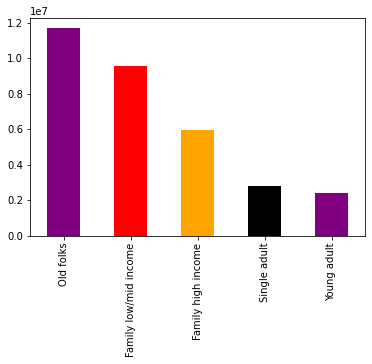

In [15]:
# Visualize best with Bar chart 

Cust_profile_bar = ds2['Cust_Profile'].value_counts().plot.bar(color =['purple', 'red', 'orange', 'black'])


In [31]:
# export the chart

Cust_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Cust_profile_bar.png'))

In [17]:
# aggregate Cust_profile prices by mean, max, min

ds2.groupby('Cust_Profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                            mean  min      max
Cust_Profile                                  
Family high income     17.291098  1.0  99999.0
Family low/mid income   8.400162  1.0  99999.0
Old folks              12.085039  1.0  99999.0
Single adult           11.453674  1.0  99999.0
Young adult            13.160515  1.0  99999.0

# P1, Q8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [ ]:
# create a sub data frame including columns Region, Cust_profile, Department ID

In [21]:
ds_sub = ds2[['region', 'Cust_Profile']]

In [28]:
# grouping regions by count of Customer profile
ds_sub.groupby(['region', 'Cust_Profile']).agg({'Cust_Profile': ['count']})


Cust_Profile
                                       count
region    Cust_Profile                      
Midwest   Family high income         1426321
          Family low/mid income      2226451
          Old folks                  2714478
          Single adult                646401
          Young adult                 583674
Northeast Family high income         1069479
          Family low/mid income      1702040
          Old folks                  2045848
          Single adult                501059
          Young adult                 404310
South     Family high income         1705840
          Family low/mid income      2803598
          Old folks                  3479276
          Single adult                816811
          Young adult                 688550
West      Family high income         1520221
          Family low/mid income      2468480
          Old folks                  2959676
          Single adult                703503
          Young adult                 641033

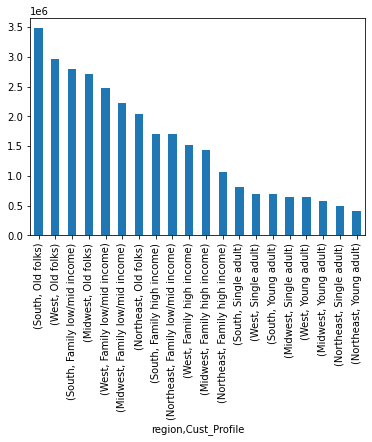

In [39]:
bar = ds_sub.value_counts().plot.bar(x='region', stacked=True)


TypeError: no numeric data to plot